# Estimate event date from indicators

* normalize indicators per district
* compute the median of local minima of indicators around reported events
* use this median as estimate of the event date

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- read original data ---
DroughtData = pd.read_csv('Droughts_satelite_and_events.csv')
districts_with_droughts = pd.read_csv('districts_with_droughts_Uganda_Kenya.csv')
print(DroughtData.columns)
print(len(DroughtData[DroughtData['drought_reported']]), 'droughts reported')

Index(['Country', 'District', 'year', 'month', 'day', 'date', 'NDVI', 'EVI',
       'precipitation_per_hour_v1', 'precipitation_per_hour_v2',
       'surface_temperature_daytime', 'surface_temperature_nighttime',
       'evapotranspiration', 'rainfall', 'SoilMoisture00_10cm',
       'SoilMoisture10_40cm', 'SoilMoisture40_100cm', 'SoilMoisture100_200cm',
       'SoilTemperature00_10cm', 'SoilTemperature10_40cm',
       'SoilTemperature40_100cm', 'SoilTemperature100_200cm',
       'air_temperature', 'wind_speed', 'SPEI_1month', 'SPEI_2month',
       'SPEI_3month', 'SPEI_4month', 'SPEI_5month', 'SPEI_6month',
       'SPEI_7month', 'SPEI_8month', 'SPEI_9month', 'SPEI_10month',
       'SPEI_11month', 'SPEI_12month', 'drought_reported',
       'drought_news_article', 'drought_desinventar'],
      dtype='object')
361 droughts reported


In [6]:
# --- define utility functions ---
from statistics import median

def crop_window_around_drought(df, drought_label, lower_bound=6, upper_bound=6):
    """ slice dataframe in time windows around certain events
    window size is [event_index-lower_bound, event_index+upper_bound]
    """
    idx = df.index.get_indexer_for(df[df[drought_label]].index)
    df_cropped = df.iloc[np.unique(np.concatenate([np.arange(max(i-lower_bound,0),
                                                             min(i+upper_bound+1, len(df))) for i in idx]))]
    return df_cropped

def find_minimum(df, variables, target, lower_bound=6, upper_bound=2):
    """ find local minima of features within a time window, compute the median and assign to new column
    window size is [event_index-lower_bound, event_index+upper_bound]
    """
    df_with_min = df.copy()
    df_with_min['drought_estimated'] = False
    df_with_min = df_with_min.reset_index()
    droughts_indices = df_with_min[df_with_min[target]].index.values
    for ind in droughts_indices:
        df_cropped = df_with_min[max(ind-lower_bound,0):min(ind+upper_bound+1, int(df_with_min.last_valid_index()))]
        # get average of minima of variables in window
        min_index = int(median([df_cropped[variable].idxmin() for variable in variables]))
        df_with_min.at[min_index, 'drought_estimated'] = True
    return df_with_min['drought_estimated'].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

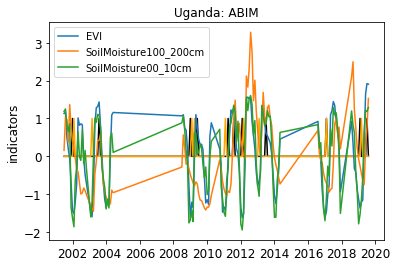

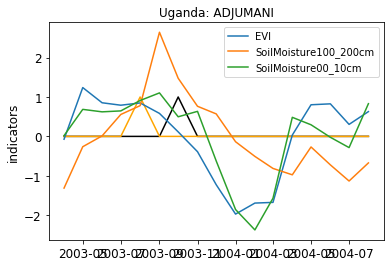

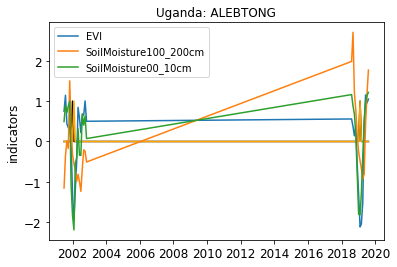

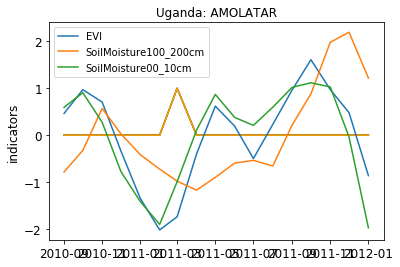

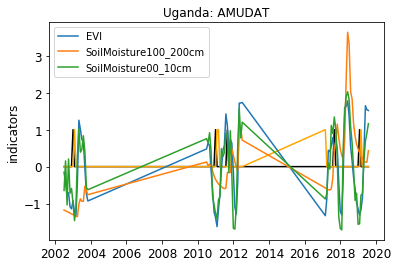

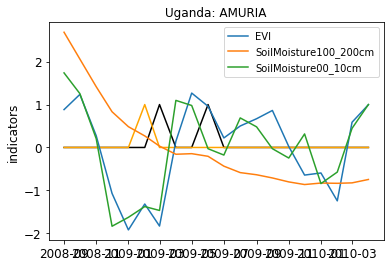

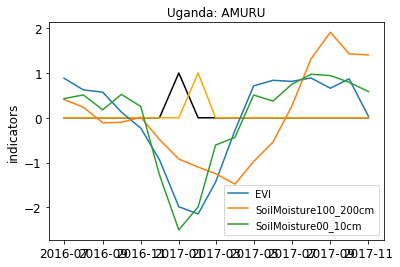

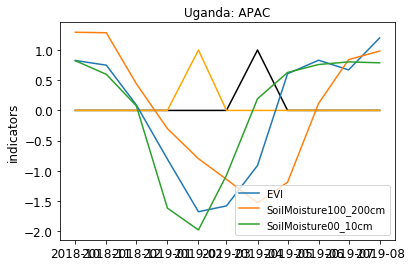

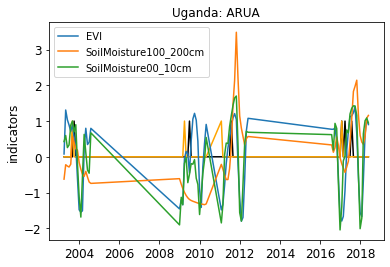

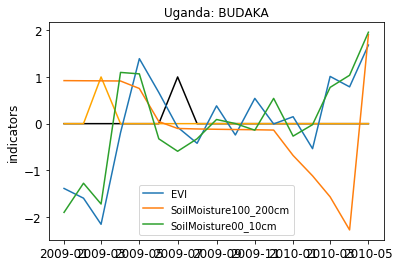

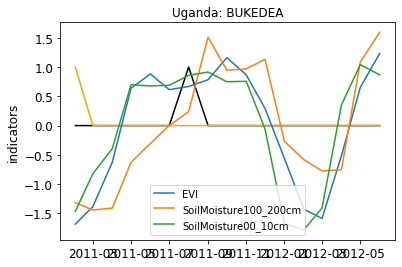

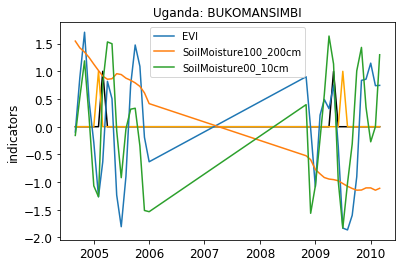

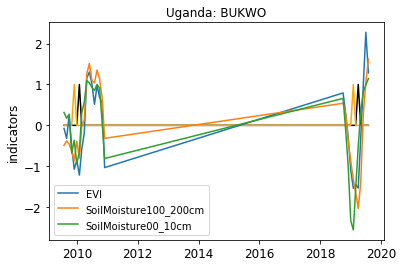

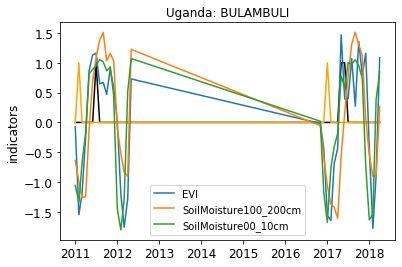

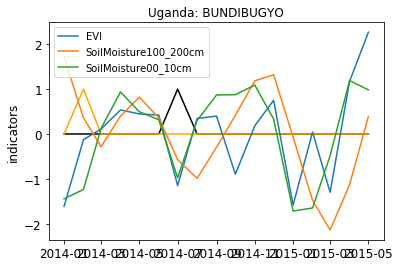

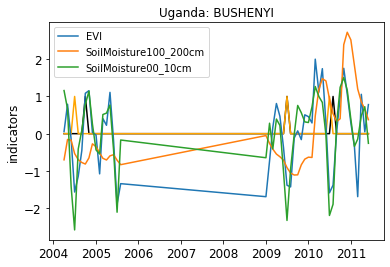

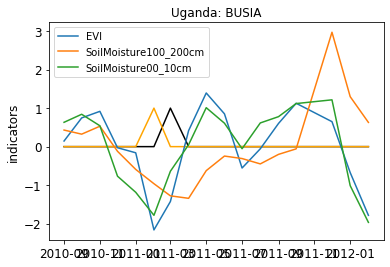

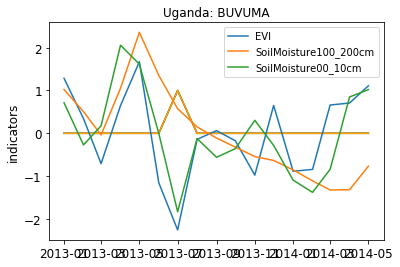

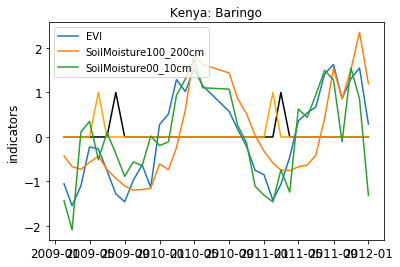

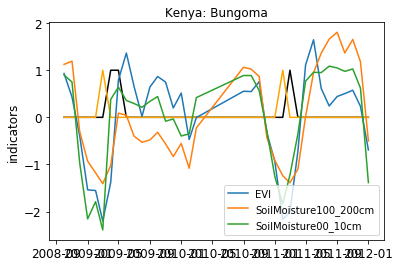

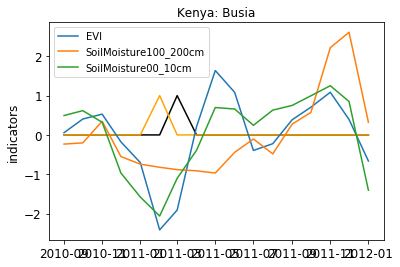

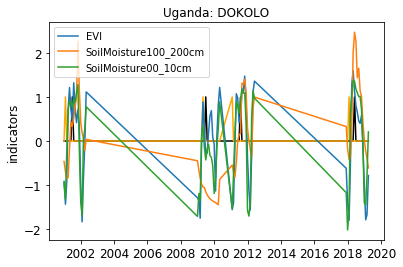

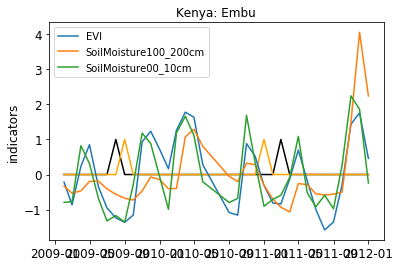

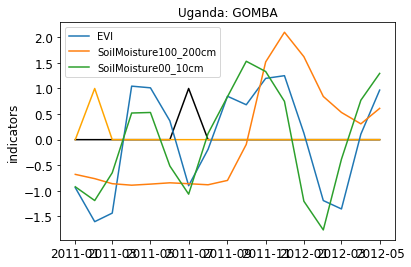

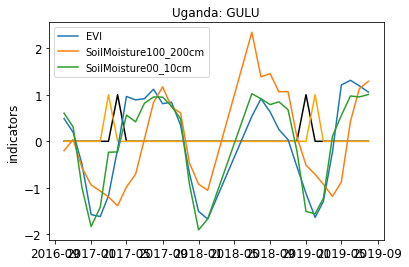

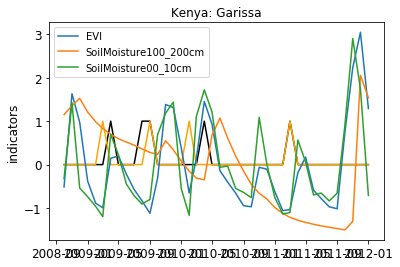

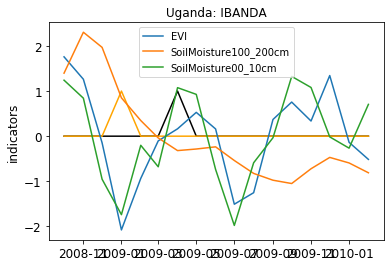

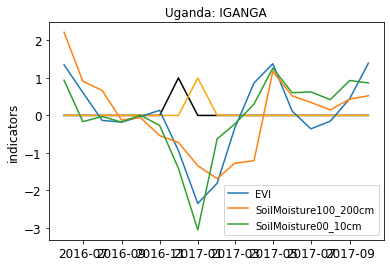

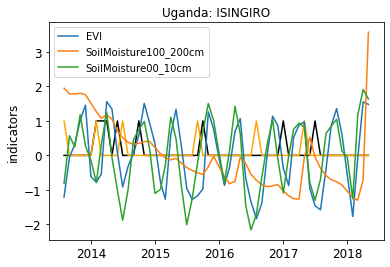

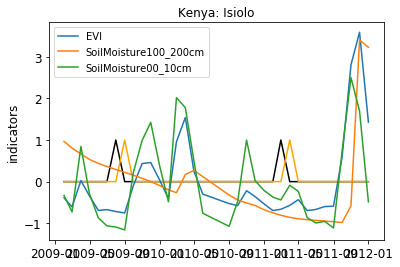

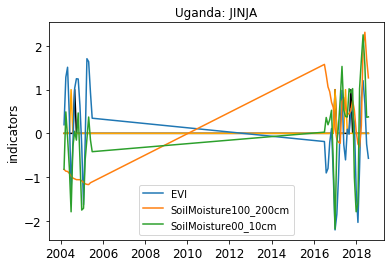

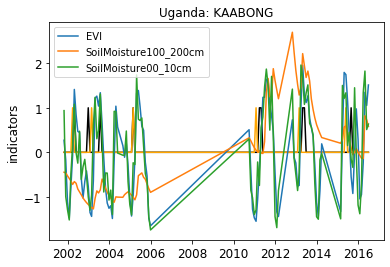

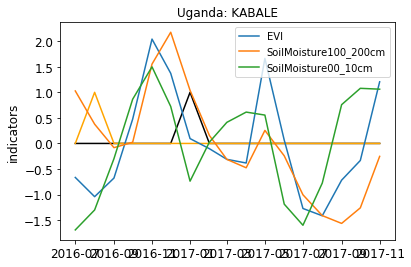

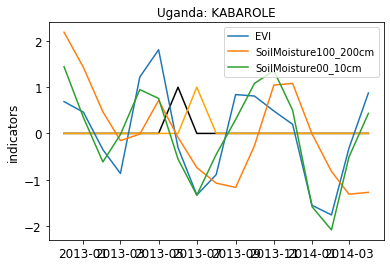

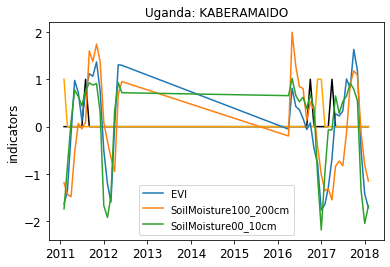

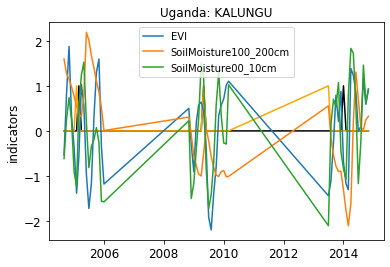

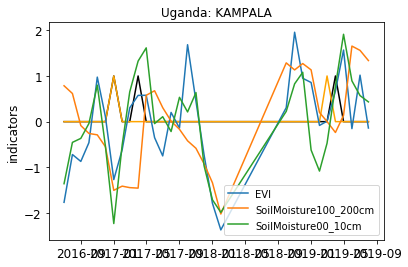

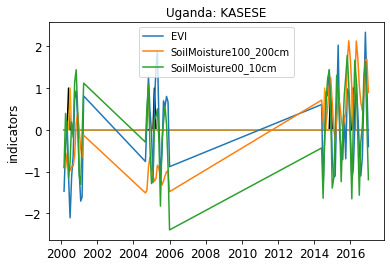

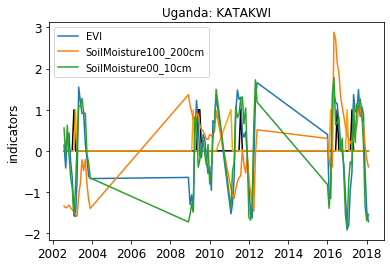

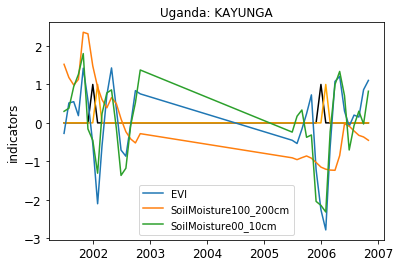

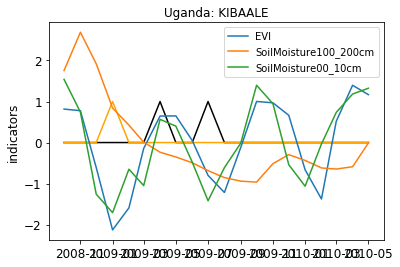

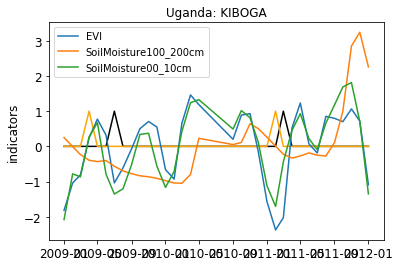

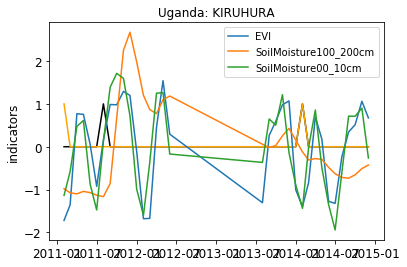

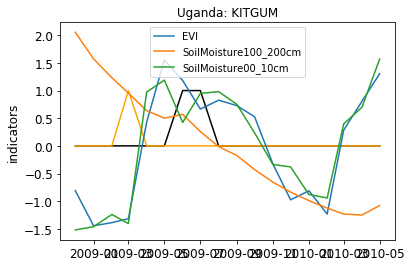

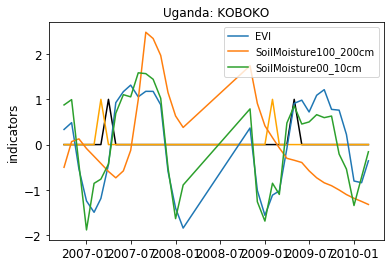

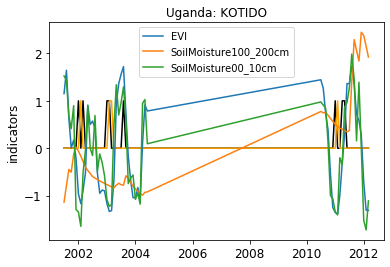

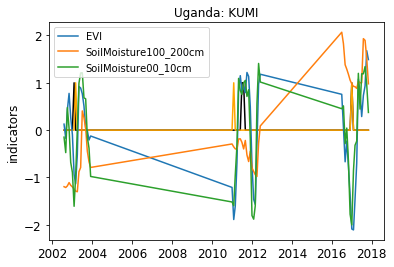

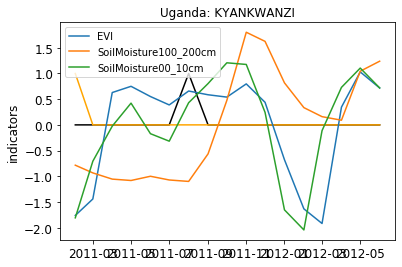

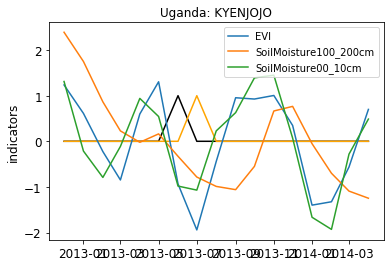

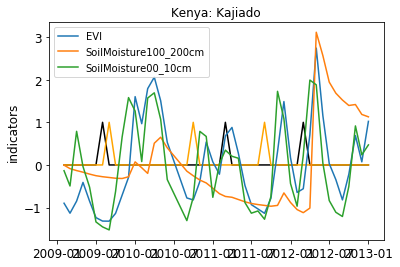

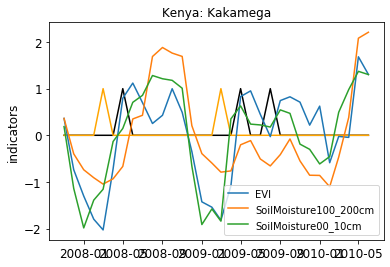

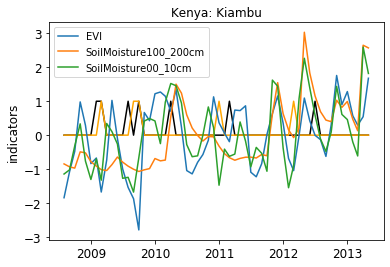

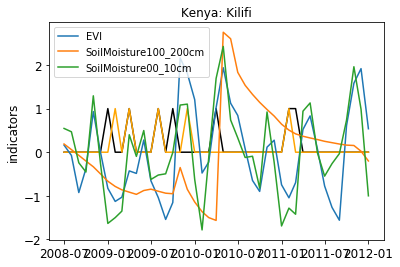

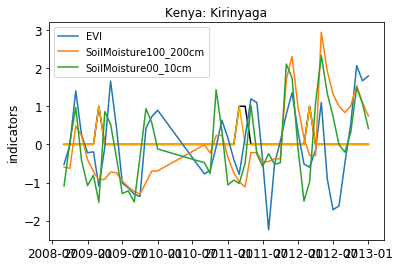

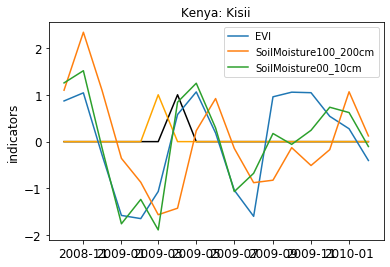

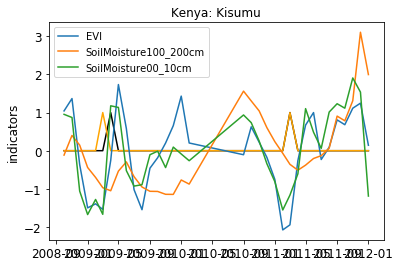

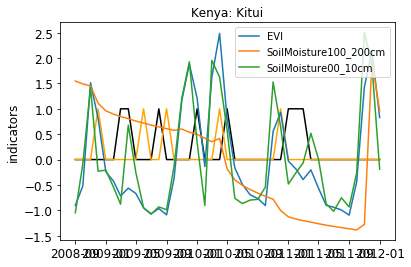

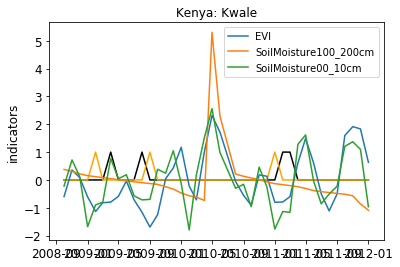

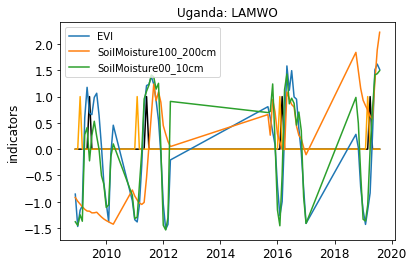

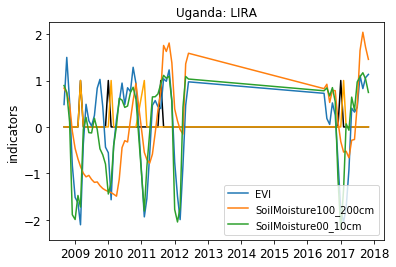

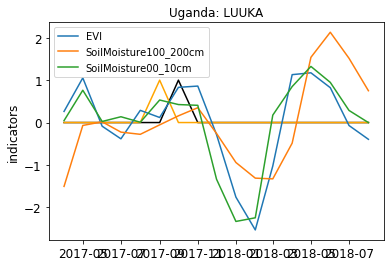

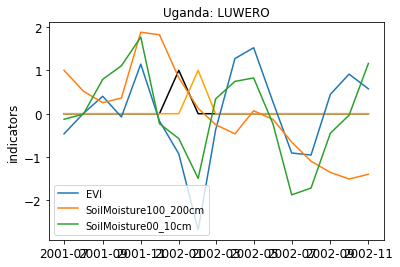

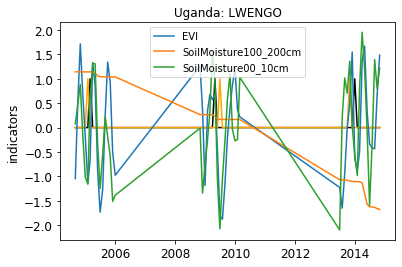

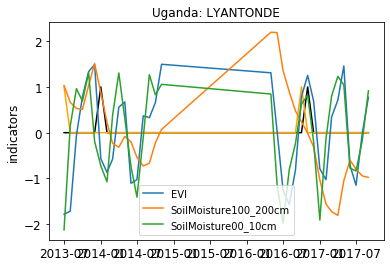

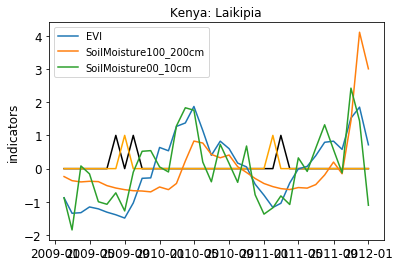

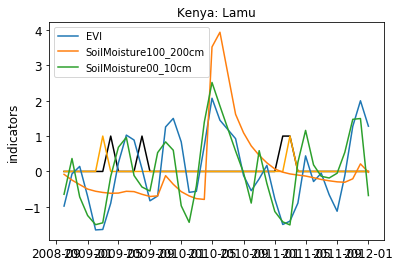

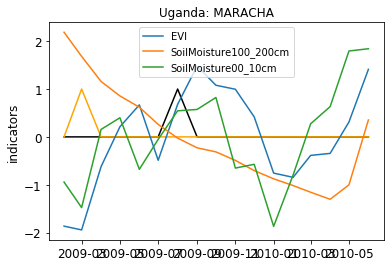

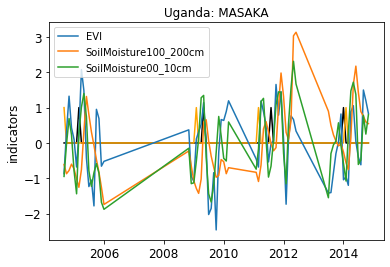

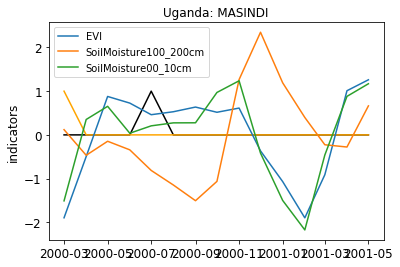

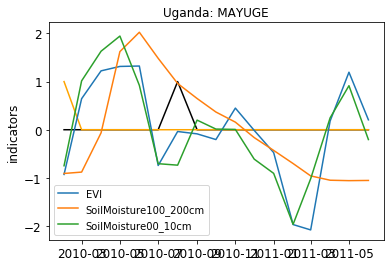

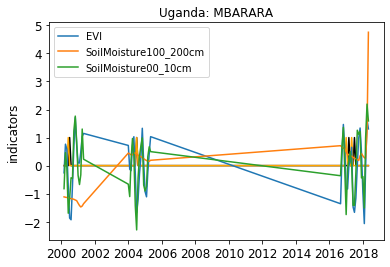

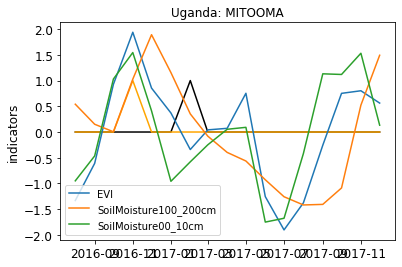

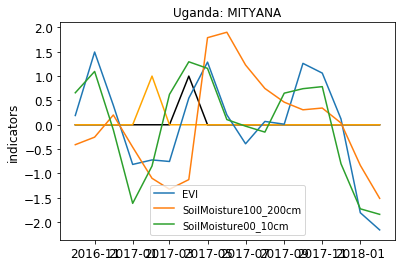

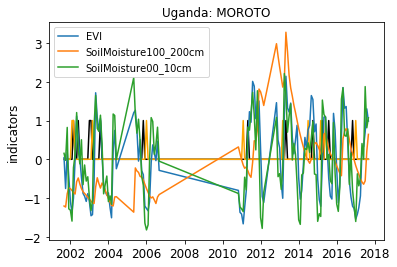

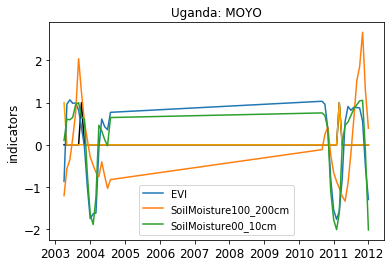

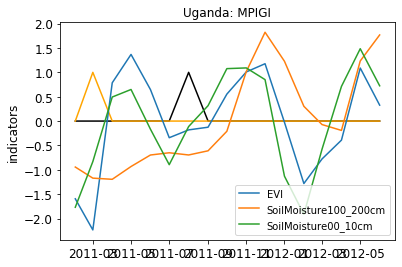

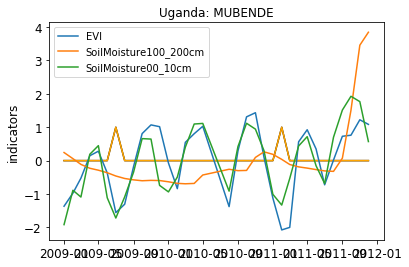

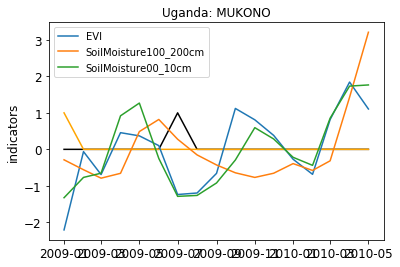

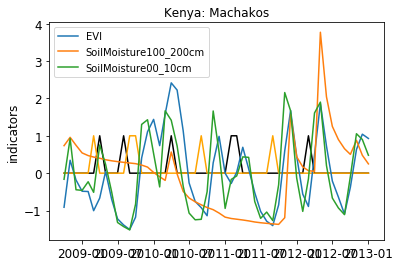

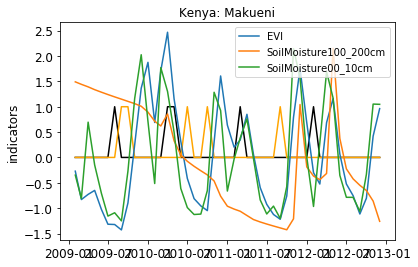

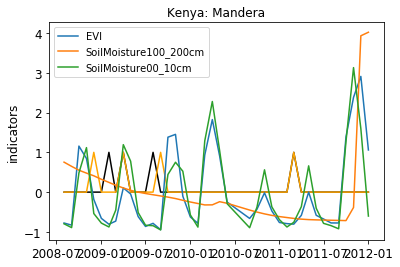

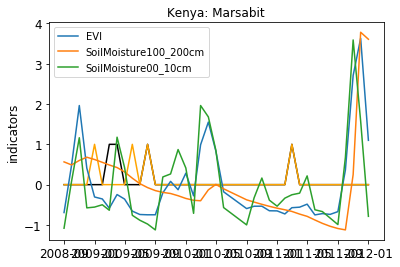

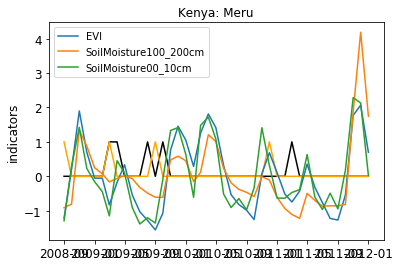

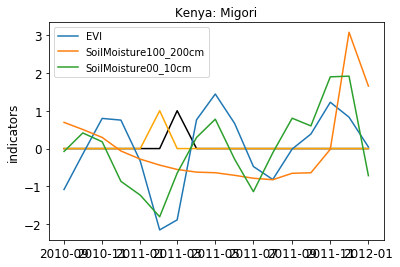

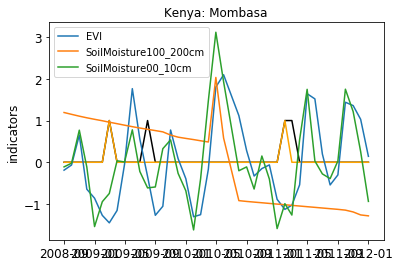

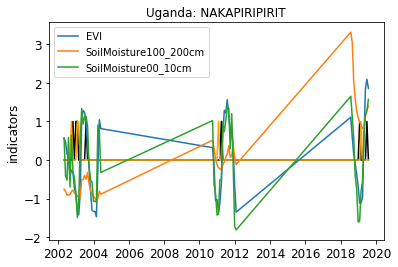

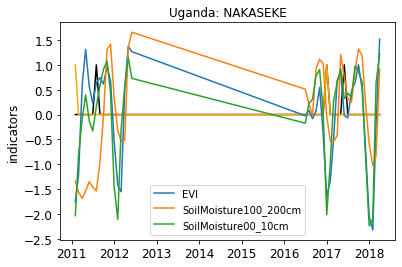

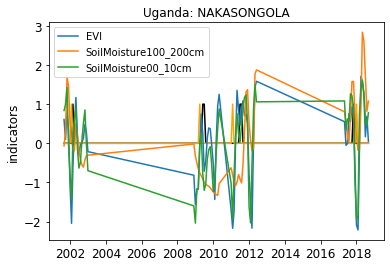

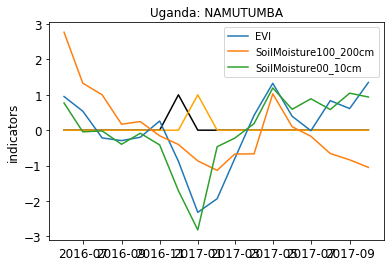

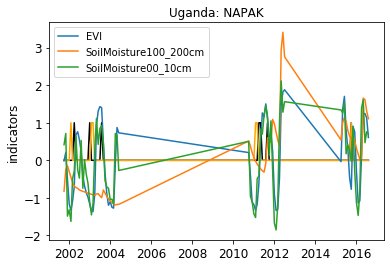

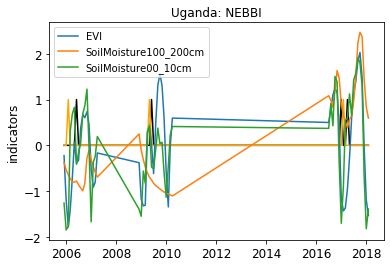

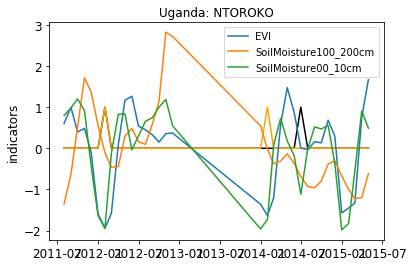

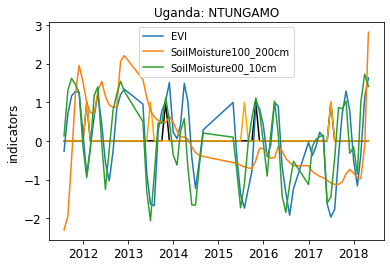

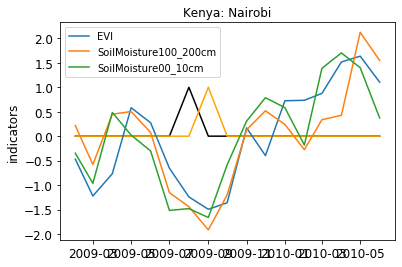

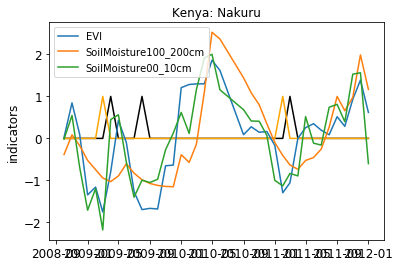

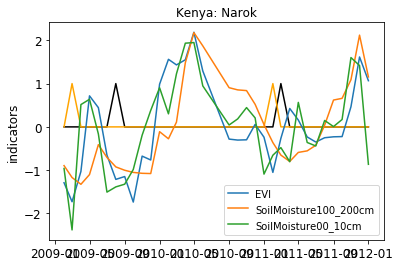

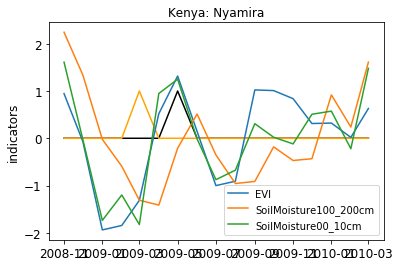

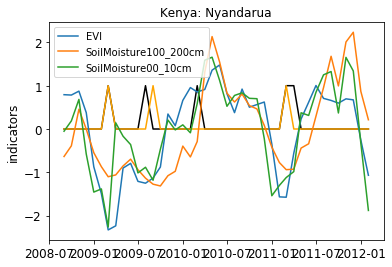

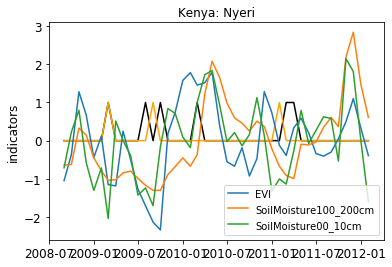

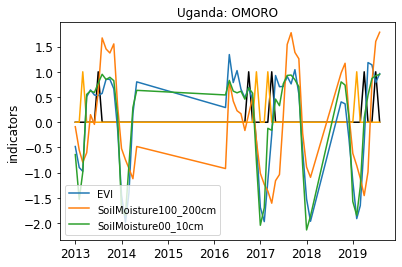

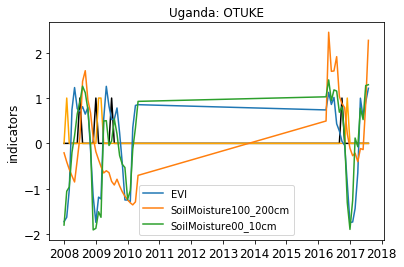

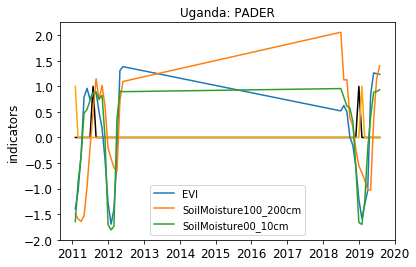

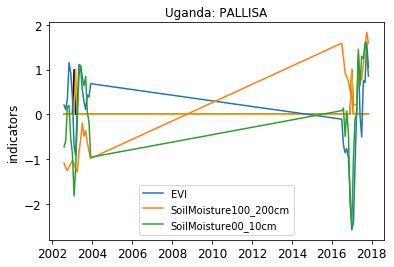

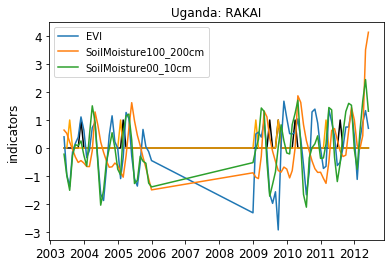

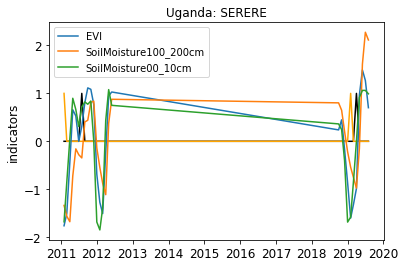

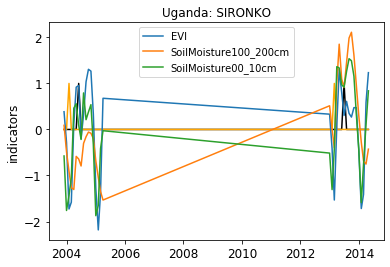

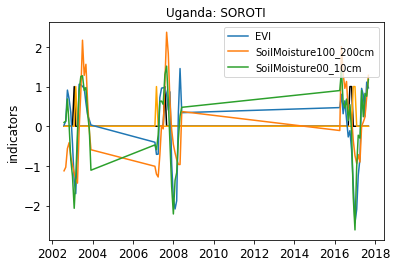

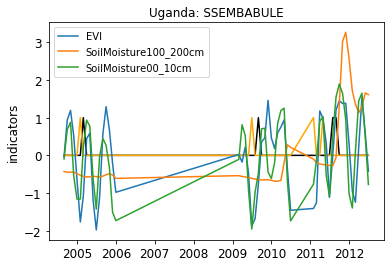

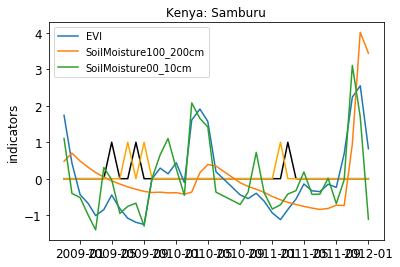

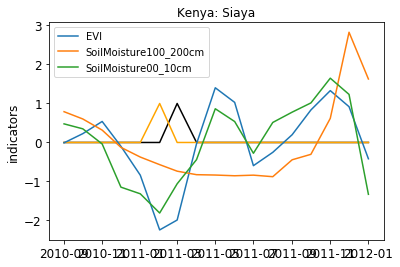

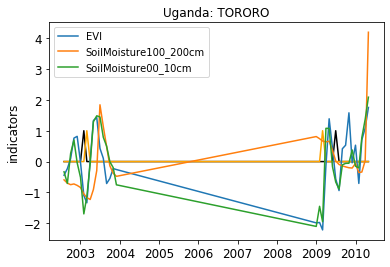

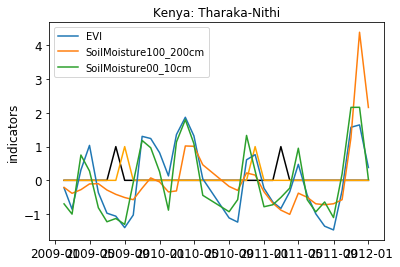

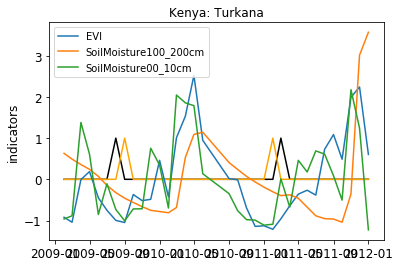

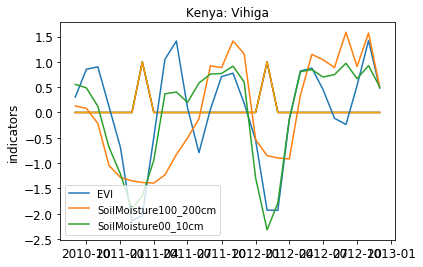

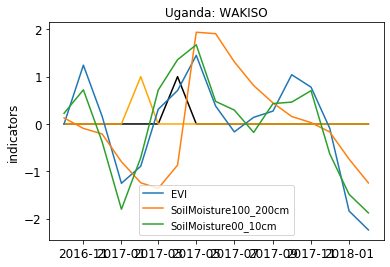

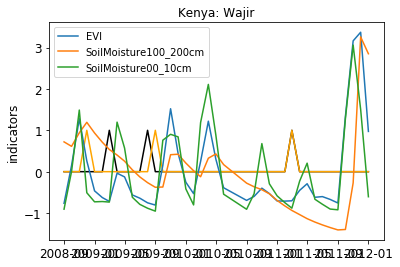

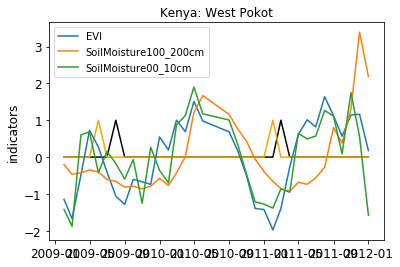

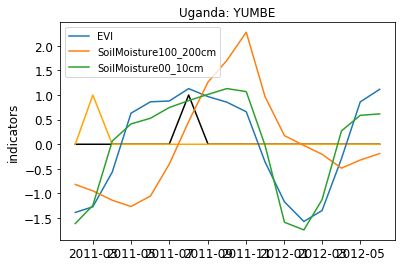

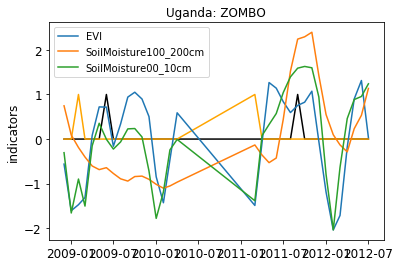

In [8]:
# --- loop over events that have a drought reported, plot events and indicators ---

dists_droughts = districts_with_droughts[(districts_with_droughts['news_articles'])
                                         | (districts_with_droughts['desinventar'])]['District']

for dist in dists_droughts:
    
    # select district
    group = DroughtData[DroughtData['District']==dist]
    country = group.Country.values[0]
    
    # crop around event
    group = crop_window_around_drought(group, 'drought_reported', lower_bound=6, upper_bound=10)
    
    # define features to plot
    features_to_study = ['EVI', 'SoilMoisture100_200cm', 'SoilMoisture00_10cm']
    
    # define features to normalize and normalize them (z-score)
    features_to_normalize = ['EVI', 'SoilMoisture100_200cm', 'SoilMoisture00_10cm']
    features = group[features_to_normalize]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    group[features_to_normalize] = features
    
    # define features to compute minimum and estimate event date
    features_to_compute_minimum = ['NDVI', 'EVI',
                                    'SoilMoisture00_10cm', 'SoilMoisture10_40cm',
                                    'SoilMoisture40_100cm', 'SoilMoisture100_200cm']
    group['drought_estimated'] = find_minimum(group, features_to_compute_minimum, 'drought_reported')
    
    plt.figure()
    plt.plot(pd.to_datetime(group.date), group['drought_reported'], color='black')
    plt.plot(pd.to_datetime(group.date), group['drought_estimated'], color='orange')
    for feat in features_to_normalize:
        plt.plot(pd.to_datetime(group.date), group[feat], label=feat)
    
    plt.title(country + ': ' + dist, fontsize=12, color='black');
    plt.xticks(fontsize=12, color="black");
    plt.yticks(fontsize=12, color="black");
    plt.ylabel('indicators', fontsize=12, color="black");
    plt.legend()

In [11]:
# --- create dataframe with normalized values and estimated event dates ---
import numpy as np

DroughtDataNormalized = pd.DataFrame(columns=DroughtData.columns)
DroughtDataNormalized['drought_estimated'] = False
features_to_normalize = ['NDVI', 'EVI',
       'precipitation_per_hour_v1', 'precipitation_per_hour_v2',
       'surface_temperature_daytime', 'surface_temperature_nighttime',
       'evapotranspiration', 'rainfall', 'SoilMoisture00_10cm',
       'SoilMoisture10_40cm', 'SoilMoisture40_100cm', 'SoilMoisture100_200cm',
       'SoilTemperature00_10cm', 'SoilTemperature10_40cm',
       'SoilTemperature40_100cm', 'SoilTemperature100_200cm',
       'air_temperature', 'wind_speed']
features_to_compute_minimum = ['NDVI', 'EVI',
                                'SoilMoisture00_10cm', 'SoilMoisture10_40cm',
                                'SoilMoisture40_100cm', 'SoilMoisture100_200cm']

for dist in DroughtData.District.unique():
    
    # select district
    group = DroughtData[DroughtData['District']==dist]   
    
    # normalize features
    features = group[features_to_normalize]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    group[features_to_normalize] = features

    # find average local minimum around reported events and save as "estimated"
    group['drought_estimated'] = find_minimum(group, features_to_compute_minimum)
    DroughtDataNormalized = pd.concat([DroughtDataNormalized, group], ignore_index=True)

DroughtDataNormalized.head()

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

ABIM reported 11 estimated 9
ADJUMANI reported 1 estimated 1
ALEBTONG reported 2 estimated 2
AMOLATAR reported 1 estimated 1
AMUDAT reported 5 estimated 5
AMURIA reported 2 estimated 1
AMURU reported 1 estimated 1
ARUA reported 6 estimated 4
BUDAKA reported 1 estimated 1
BUDUDA reported 0 estimated 0
BUGIRI reported 0 estimated 0


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

BUHWEJU reported 0 estimated 0
BUIKWE reported 0 estimated 0
BUKOMANSIMBI reported 2 estimated 2
BUKWO reported 2 estimated 2
BULAMBULI reported 3 estimated 2
BULIISA reported 0 estimated 0
BUNDIBUGYO reported 1 estimated 1
BUNYANGABU reported 0 estimated 0
BUSHENYI reported 3 estimated 3
BUSIA reported 1 estimated 1
BUTALEJA reported 0 estimated 0


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

BUTAMBALA reported 0 estimated 0
BUTEBO reported 0 estimated 0
BUVUMA reported 1 estimated 1
DOKOLO reported 4 estimated 4
GOMBA reported 1 estimated 1
GULU reported 2 estimated 2
HOIMA reported 0 estimated 0
IBANDA reported 1 estimated 1
IGANGA reported 1 estimated 1
JINJA reported 3 estimated 3


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

KAABONG reported 9 estimated 6
KABALE reported 1 estimated 1
KABERAMAIDO reported 3 estimated 3
KAGADI reported 0 estimated 0
MOROTO reported 12 estimated 10
MOYO reported 2 estimated 2
MPIGI reported 1 estimated 1
MUBENDE reported 2 estimated 2


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

MUKONO reported 1 estimated 1
NAKAPIRIPIRIT reported 7 estimated 5
NAKASEKE reported 3 estimated 2
NAKASONGOLA reported 6 estimated 4
NAMAYINGO reported 0 estimated 0
NAMISINDWA reported 0 estimated 0
NAMUTUMBA reported 1 estimated 1
NAPAK reported 7 estimated 6


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

NEBBI reported 4 estimated 3
NGORA reported 0 estimated 0
NTUNGAMO reported 4 estimated 4
NWOYA reported 0 estimated 0
OMORO reported 5 estimated 4
OTUKE reported 4 estimated 4
OYAM reported 0 estimated 0
PADER reported 2 estimated 2


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

PAKWACH reported 0 estimated 0
PALLISA reported 2 estimated 2
RAKAI reported 6 estimated 5
RUBANDA reported 0 estimated 0
RUBIRIZI reported 0 estimated 0
RUKIGA reported 0 estimated 0
RUKUNGIRI reported 0 estimated 0
SERERE reported 2 estimated 2
SHEEMA reported 0 estimated 0
SIRONKO reported 2 estimated 2


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

SOROTI reported 4 estimated 4
SSEMBABULE reported 4 estimated 4
TORORO reported 2 estimated 2
WAKISO reported 1 estimated 1
ZOMBO reported 2 estimated 2
KAKUMIRO reported 0 estimated 0
KALIRO reported 0 estimated 0
KALUNGU reported 3 estimated 3


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

KAMPALA reported 3 estimated 2
KAMWENGE reported 0 estimated 0
KANUNGU reported 0 estimated 0
KAPCHORWA reported 0 estimated 0
KASESE reported 4 estimated 4
KATAKWI reported 6 estimated 5


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

KIBAALE reported 2 estimated 1
KIBOGA reported 2 estimated 2
KIBUKU reported 0 estimated 0
KIRUHURA reported 2 estimated 2
KISORO reported 0 estimated 0
KITGUM reported 2 estimated 1
KOBOKO reported 2 estimated 2
KOLE reported 0 estimated 0
KUMI reported 4 estimated 3


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

KWEEN reported 0 estimated 0
KYANKWANZI reported 1 estimated 1
KYEGEGWA reported 0 estimated 0
KYENJOJO reported 1 estimated 1
KYOTARA reported 0 estimated 0
LAMWO reported 4 estimated 4
LIRA reported 4 estimated 4
LUUKA reported 1 estimated 1


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

LUWERO reported 1 estimated 1
LWENGO reported 3 estimated 3
LYANTONDE reported 2 estimated 2
MANAFWA reported 0 estimated 0
MARACHA reported 1 estimated 1
MASAKA reported 4 estimated 4
MASINDI reported 1 estimated 1
MBALE reported 0 estimated 0


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

MBARARA reported 4 estimated 4
MITOOMA reported 1 estimated 1
AGAGO reported 0 estimated 0
APAC reported 1 estimated 1
KIRYANDONGO reported 0 estimated 0
KALANGALA reported 0 estimated 0
YUMBE reported 1 estimated 1
KABAROLE reported 1 estimated 1


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

MITYANA reported 1 estimated 1
ISINGIRO reported 8 estimated 6
MAYUGE reported 1 estimated 1
BUYENDE reported 0 estimated 0
KAYUNGA reported 2 estimated 2
NTOROKO reported 2 estimated 2
KOTIDO reported 8 estimated 4


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

KAMULI reported 0 estimated 0
BUKEDEA reported 1 estimated 1
Kwale reported 4 estimated 3
Laikipia reported 3 estimated 2
Lamu reported 4 estimated 2
Machakos reported 6 estimated 5


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Makueni reported 5 estimated 5
Mandera reported 4 estimated 4
Marsabit reported 4 estimated 4
Meru reported 5 estimated 4
Migori reported 1 estimated 1
Mombasa reported 4 estimated 2
Nairobi reported 1 estimated 1


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Nakuru reported 3 estimated 2
Baringo reported 2 estimated 2
Bomet reported 0 estimated 0
Bungoma reported 3 estimated 2
Busia reported 1 estimated 1
Elgeyo-Marakwet reported 0 estimated 0
Embu reported 2 estimated 2


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Garissa reported 5 estimated 4
Homa Bay reported 0 estimated 0
Isiolo reported 2 estimated 2
Kajiado reported 3 estimated 3
Kakamega reported 3 estimated 2
Kericho reported 0 estimated 0


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Kiambu reported 7 estimated 5
Kilifi reported 7 estimated 5
Kirinyaga reported 4 estimated 3
Kisii reported 1 estimated 1
Kisumu reported 2 estimated 2


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Kitui reported 8 estimated 5
Nandi reported 0 estimated 0
Narok reported 2 estimated 2
Nyamira reported 1 estimated 1
Nyandarua reported 5 estimated 3
Nyeri reported 6 estimated 3


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Samburu reported 3 estimated 3
Siaya reported 1 estimated 1
Taita Taveta reported 0 estimated 0
Tana River reported 0 estimated 0
Tharaka-Nithi reported 2 estimated 2
Trans Nzoia reported 0 estimated 0
Turkana reported 2 estimated 2


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Uasin Gishu reported 0 estimated 0
Vihiga reported 2 estimated 2
Wajir reported 3 estimated 3
West Pokot reported 2 estimated 2
Murang'a reported 0 estimated 0


C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Country District  year month day        date      NDVI       EVI  \
0  Uganda     ABIM  2000     3   1  2000-03-01 -1.874641 -1.570809   
1  Uganda     ABIM  2000     4   1  2000-04-01 -1.206775 -1.143460   
2  Uganda     ABIM  2000     5   1  2000-05-01  0.544968  0.484206   
3  Uganda     ABIM  2000     6   1  2000-06-01  0.853214  0.948032   
4  Uganda     ABIM  2000     7   1  2000-07-01  1.180418  1.321811   

   precipitation_per_hour_v1  precipitation_per_hour_v2  ...  SPEI_7month  \
0                  -1.217134                  -1.210825  ...          NaN   
1                   0.554526                   0.337322  ...          NaN   
2                   0.726150                   0.654021  ...          NaN   
3                   0.974735                   0.485003  ...          NaN   
4                   0.368088                  -0.002803  ...          NaN   

   SPEI_8month  SPEI_9month  SPEI_10month  SPEI_11month  SPEI_12month  \
0          NaN          NaN           NaN           NaN           NaN   
1          NaN          NaN           NaN           NaN           NaN   
2          NaN          NaN           NaN           NaN           NaN   
3          NaN          NaN           NaN           NaN           NaN   
4          NaN          NaN           NaN           NaN           NaN   

   drought_reported  drought_news_article  drought_desinventar  \
0             False                 False                False   
1             False                 False                False   
2             False                 False                False   
3             False                 False                False   
4             False                 False                False   

   drought_estimated  
0              False  
1              False  
2              False  
3              False  
4              False  

[5 rows x 40 columns]

In [13]:
DroughtDataNormalized.to_csv('Droughts_satelite_data_events_1month_normalized_corrected.csv')

In [12]:
len(DroughtDataNormalized[DroughtDataNormalized['drought_estimated']])

305